## Visualization of Scores Data with the Crowdmark API

[Crowdmark API Guide (under development)](https://crowdmark-api-docs.surge.sh)

Goals: Use the Crowdmark API to

1. Extract scores from an assessment
2. Visualize scores:
    + correlation matrix
    + heat map
    + distribution
    + pairwise distribution
    

In [15]:
## Some math and data tools
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

In [16]:
# Import seaborn for visualizing data graphically
import seaborn as sns
sns.set()

In [17]:
## For graphing in this notebook
%matplotlib inline

## Enter your Crowdmark API key

In [18]:
## Execute this cell to generate a request for your API key.
## Paste your api key into the text field (and press enter); Comment out the next line to define your API Key.
# api = input("What is your Crowdmark API key:")

In [19]:
## This cell writes the content of `api` to the file .crowdmark-key.
## Comment out the next two lines to write the api entered in cell above 
## to the file .crowdmark-key in current directory.

# with open(".crowdmark-key", "w") as text_file:
#   print(f"{api}", file=text_file)

In [20]:
# This cell reads in the .crowdmark-key file and saves it as apiKey.
# The API key allows the computer hosting your Jupyter notebook to programmatically access data from Crowdmark.
with open(".crowdmark-key", 'r') as f:
    apiKey = f.read().rstrip()
# apiKey

In [21]:
## Define the URL endpoint for accessing the booklets data from the Crowdmark API.
cm = 'https://app.crowdmark.com'

## Connect to Scores Data on Crowdmark

### Specifying the Assessment for Analysis

![assessment_slug](https://wwejubwfy.s3.amazonaws.com/WUSTL_Demonstration_Assessment__Crowdmark_2017-01-07_15-58-14.png)

In [38]:
# Define the assessment to investigate.
# Select the assessment slug from inside the URL from the assessment's dashboard on Crowdamrk.
# https://app.crowdmark.com/exams/<assessment-slug>/dashboard
# assessment_slug = 'math-sample-assessment-fe8c2'
assessment_slug = 'test-2-upload-fae80'


In [39]:
#URL for API, Crowdmark API URL in this case
url = 'https://app.crowdmark.com/api/assessments/' + assessment_slug + '/results.csv' + '?api_key=' + apiKey

In [40]:
# Download the CSV data from the Crowdmark URL and store as a Pandas Dataframe
data = pd.read_csv(url)

## Explore Data

In [41]:
# Show the columns in the data set.
# Sometimes, the `First Name` fields that appear later need to be edited to `Name`.
data.columns

Index(['Crowdmark ID', 'Score URL', 'Email', 'Name', 'Student ID Number',
       'Prob #10', 'Prob #11', 'Prob #12', 'MC-total', 'Total', 'Started At',
       'Penalty', 'Custom Penalty', 'Total After Penalty', 'Submitted At',
       'State'],
      dtype='object')

In [42]:
# Describe the data set
data.describe()

,Crowdmark ID,Student ID Number,Prob #10,Prob #11,Prob #12,MC-total,Total,Started At,Penalty,Custom Penalty,Total After Penalty
count,131.000000,1.310000e+02,104.000000,108.000000,100.000000,131.0,110.000000,0.0,110.0,0.0,110.000000
mean,66.000000,3.987694e+08,6.365385,5.421296,5.830000,0.0,16.640909,NaN,0.0,NaN,16.640909
std,37.960506,1.749966e+07,1.801066,1.325808,3.077468,0.0,5.699321,NaN,0.0,NaN,5.699321
min,1.000000,2.000063e+08,0.000000,1.500000,0.000000,0.0,2.000000,NaN,0.0,NaN,2.000000
25%,33.500000,4.002968e+08,6.000000,5.000000,3.500000,0.0,13.000000,NaN,0.0,NaN,13.000000
50%,66.000000,4.003146e+08,7.000000,5.500000,7.250000,0.0,17.750000,NaN,0.0,NaN,17.750000
75%,98.500000,4.003253e+08,7.000000,6.125000,8.500000,0.0,21.000000,NaN,0.0,NaN,21.000000
max,131.000000,4.003467e+08,8.000000,7.000000,9.000000,0.0,24.000000,NaN,0.0,NaN,24.000000


## Localize Data to Score Columns

In [43]:
# Restrict attention to the score columns for detailed visualization
# Cut and paste the column labels for the questions from above
# df = data[['Q1', 'Q2', 'Q3']]
df = data [[ 'Prob #10', 'Prob #11', 'Prob #12']]

## Scores Correlation Matrix

In [44]:
corr = df.corr

<AxesSubplot:>

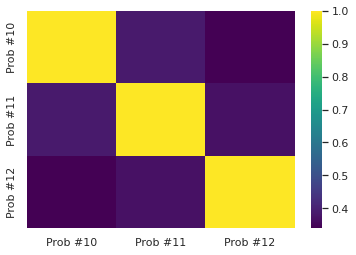

In [45]:
sns.heatmap(corr('pearson'), cmap="viridis")

In [46]:
df.corr()

,Prob #10,Prob #11,Prob #12
Prob #10,1.000000,0.384673,0.339107
Prob #11,0.384673,1.000000,0.367611
Prob #12,0.339107,0.367611,1.000000


## Scores Heatmap

<AxesSubplot:>

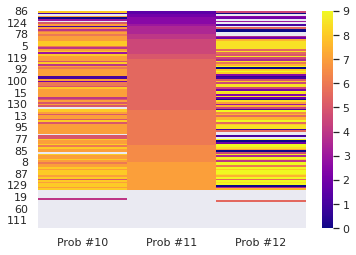

In [49]:
# Plot a score heatmap sorted on a specific column
sns.heatmap(df.sort_values(by=['Prob #11']), cmap="plasma")

In [50]:
df.columns

Index(['Prob #10', 'Prob #11', 'Prob #12'], dtype='object')

## Scores Distribution

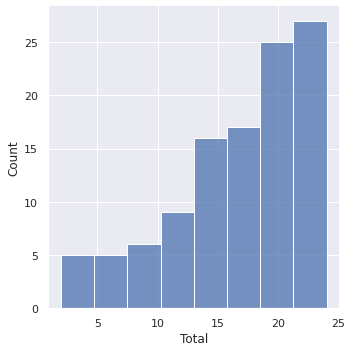

In [51]:
sns.displot(data['Total'])

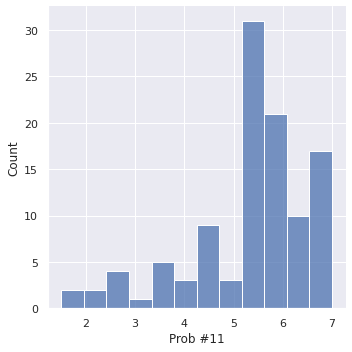

In [52]:
sns.displot(data['Prob #11'])

## Pairwise Relationships

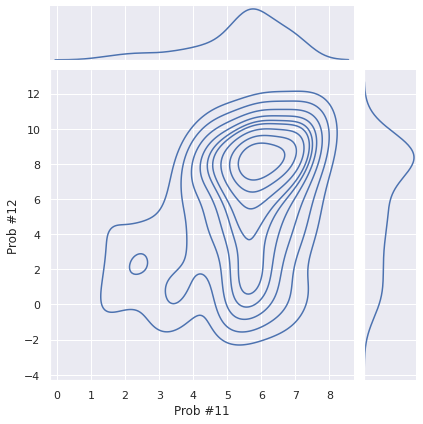

In [53]:
sns.jointplot(x=data['Prob #11'], y=data['Prob #12'], kind = "kde")

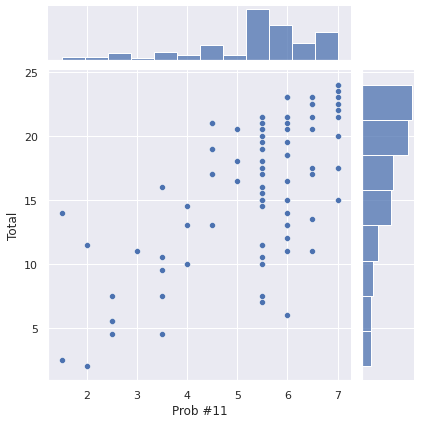

In [54]:
sns.jointplot(x=data['Prob #11'], y=data['Total'])

## Pivot Table

In [ ]:
from pivottablejs import pivot_ui
pivot_ui(data)